In [5]:
# made by Gibeom LEE, HI LAB
# Vpp finder와 기능은 같음. 다만, 일부분 피크를 발췌해서 정리해줌!

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [7]:
# -------------------------------
# 사용자 선택: 피크 탐지 모드
# "neg"  → 음의 피크만
# "pos"  → 양의 피크만
# "both" → 양/음 피크 모두
peak_mode = "both"

# -------------------------------
# 폴더 경로
folder_path = r"C:\Users\user\Desktop\Drive파일\HI Lab\0. Projects\0. On going\1. ionic DC-TENG\0. 실험자료\6. data measurement\250921\csv파일"

# 사용자 설정값
prominence_ratio = 0.3   # 표준편차(std) * 비율로 prominence 기준 설정
min_prominence   = 0.1   # prominence 하한 
min_distance_sec = 0.15  # 인접 피크 최소 간격(초)
snr_threshold    = 1     # SNR 기준
min_relative_height = 0.05  # 전체 최대 진폭 대비 최소 비율
window_peaks = 10         # <<<< 연속 피크 개수

# 그래프 Y축
y_range = (None, None)
y_range = (-350, 350)

# csv파일 저장
save_summary_csv = False  # False 로 하면 CSV 저장 안 함

0921_10_ac_Vpp: 310.95 V
0921_10_ac_Peak number: 77개
0921_10_ac_표준편차: 7.19
0921_10_ac_주파수: 33.84 Hz
👉 0921_10_ac 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 1612.77
   - 발췌 평균 Vpp: 322.42 V (표준편차: 4.37 V)
   - 발췌 평균 주파수: 30.12 Hz


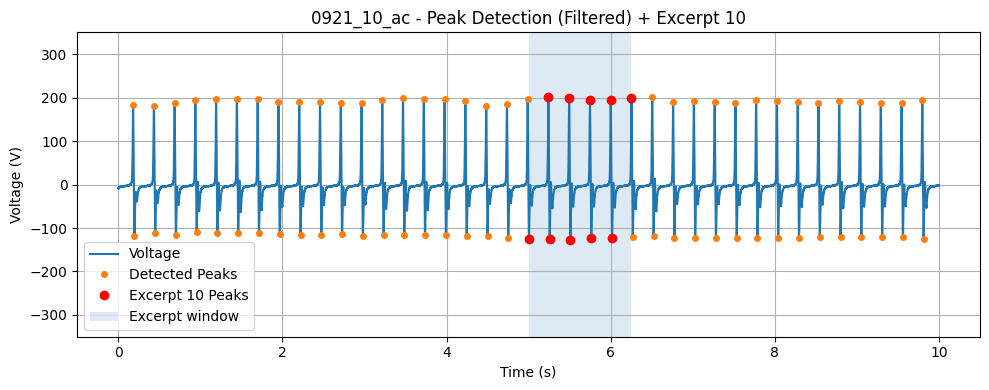

0921_10_ac_2_Vpp: 350.63 V
0921_10_ac_2_Peak number: 78개
0921_10_ac_2_표준편차: 3.03
0921_10_ac_2_주파수: 12.05 Hz
👉 0921_10_ac_2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 1766.41
   - 발췌 평균 Vpp: 353.35 V (표준편차: 0.48 V)
   - 발췌 평균 주파수: 12.81 Hz


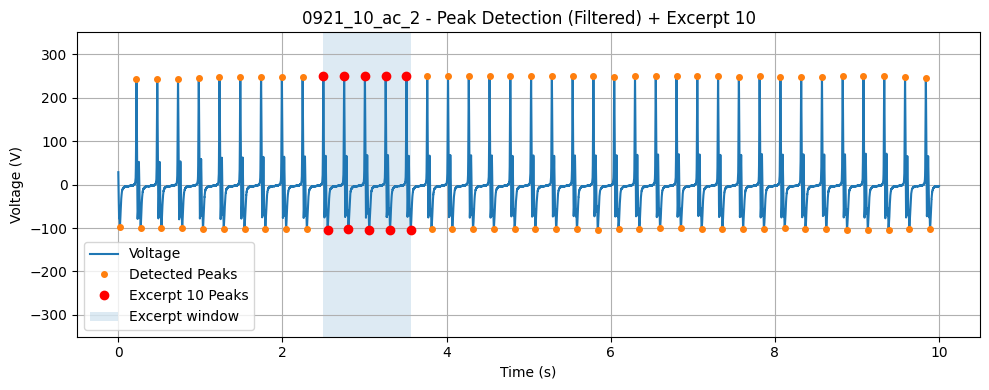

0921_10_dc_Vpp: 3.59 V
0921_10_dc_Peak number: 70개
0921_10_dc_표준편차: 0.45
0921_10_dc_주파수: 21.95 Hz
👉 0921_10_dc 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 127.15
   - 발췌 평균 Vpp: 3.76 V (표준편차: 0.05 V)
   - 발췌 평균 주파수: 20.85 Hz


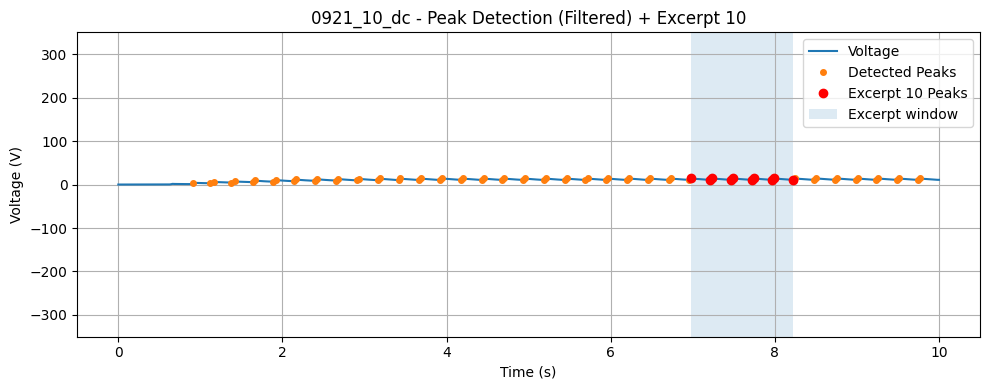

0921_10_dc_2_Vpp: 2.91 V
0921_10_dc_2_Peak number: 70개
0921_10_dc_2_표준편차: 0.33
0921_10_dc_2_주파수: 18.27 Hz
👉 0921_10_dc_2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 104.21
   - 발췌 평균 Vpp: 3.02 V (표준편차: 0.14 V)
   - 발췌 평균 주파수: 18.28 Hz


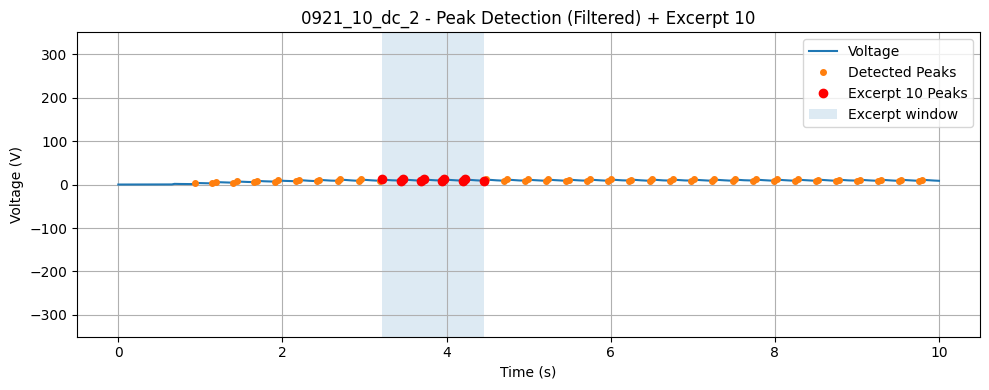

0921_12_ac_Vpp: 349.13 V
0921_12_ac_Peak number: 77개
0921_12_ac_표준편차: 3.03
0921_12_ac_주파수: 13.14 Hz
👉 0921_12_ac 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 1768.63
   - 발췌 평균 Vpp: 354.03 V (표준편차: 1.07 V)
   - 발췌 평균 주파수: 13.73 Hz


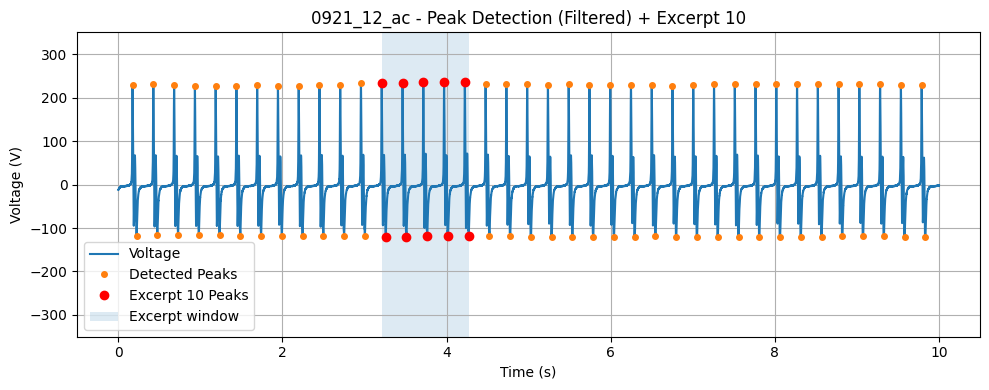

0921_12_ac_2_Vpp: 371.67 V
0921_12_ac_2_Peak number: 78개
0921_12_ac_2_표준편차: 6.45
0921_12_ac_2_주파수: 13.35 Hz
👉 0921_12_ac_2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 1902.45
   - 발췌 평균 Vpp: 380.40 V (표준편차: 1.92 V)
   - 발췌 평균 주파수: 14.06 Hz


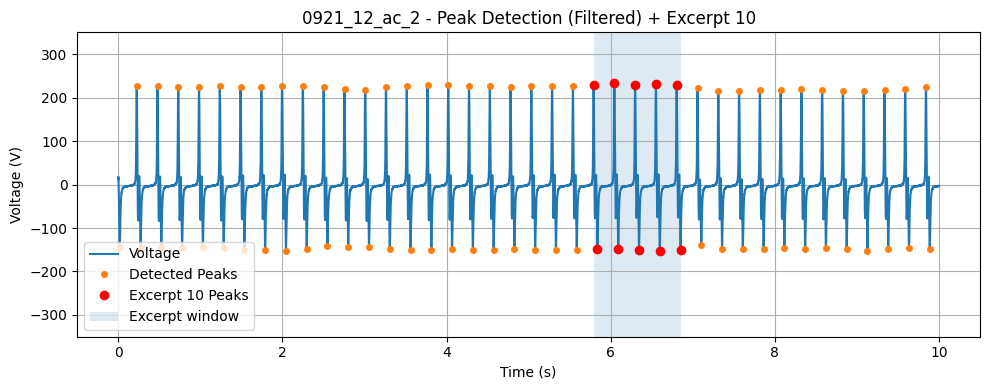

0921_12_dc_Vpp: 3.47 V
0921_12_dc_Peak number: 71개
0921_12_dc_표준편차: 0.39
0921_12_dc_주파수: 23.04 Hz
👉 0921_12_dc 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 142.30
   - 발췌 평균 Vpp: 3.55 V (표준편차: 0.06 V)
   - 발췌 평균 주파수: 21.64 Hz


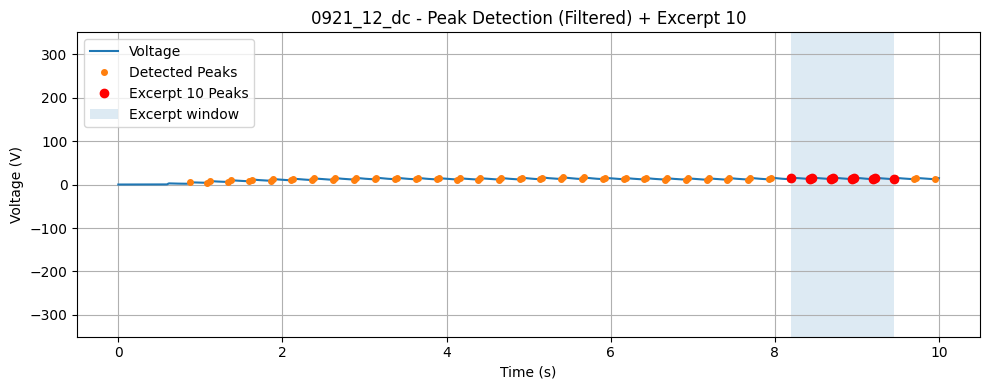

0921_12_dc_2_Vpp: 4.65 V
0921_12_dc_2_Peak number: 70개
0921_12_dc_2_표준편차: 0.47
0921_12_dc_2_주파수: 20.29 Hz
👉 0921_12_dc_2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 163.13
   - 발췌 평균 Vpp: 4.79 V (표준편차: 0.04 V)
   - 발췌 평균 주파수: 23.13 Hz


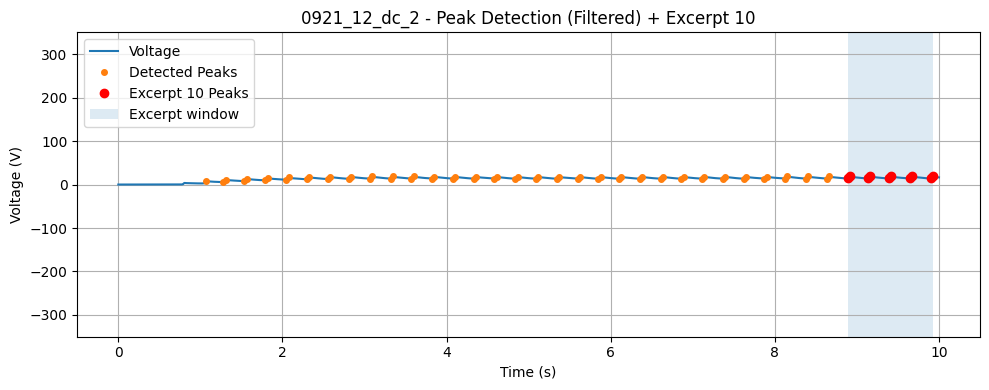

0921_14_ac_Vpp: 378.32 V
0921_14_ac_Peak number: 79개
0921_14_ac_표준편차: 10.61
0921_14_ac_주파수: 15.29 Hz
👉 0921_14_ac 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 1943.58
   - 발췌 평균 Vpp: 389.77 V (표준편차: 3.54 V)
   - 발췌 평균 주파수: 13.62 Hz


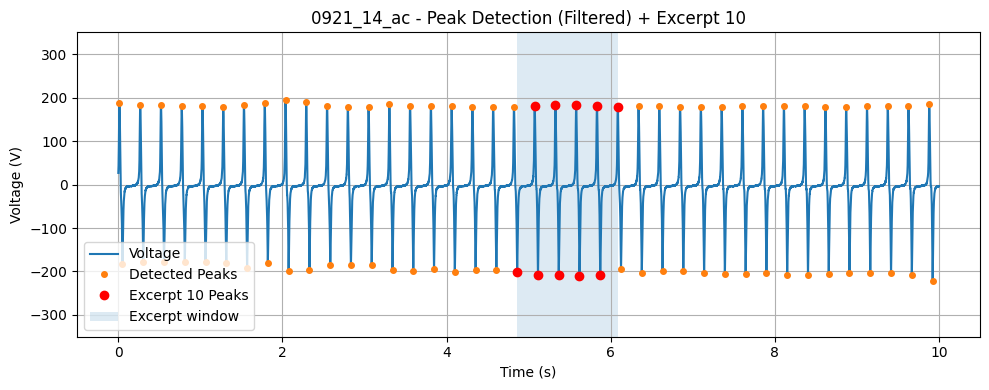

0921_14_ac_2_Vpp: 446.61 V
0921_14_ac_2_Peak number: 78개
0921_14_ac_2_표준편차: 5.23
0921_14_ac_2_주파수: 13.49 Hz
👉 0921_14_ac_2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 2262.19
   - 발췌 평균 Vpp: 452.42 V (표준편차: 1.72 V)
   - 발췌 평균 주파수: 14.36 Hz


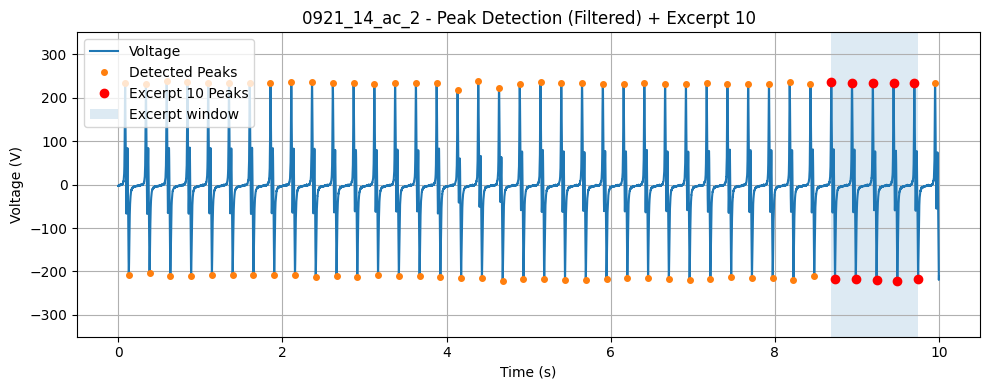

0921_14_dc_Vpp: 4.12 V
0921_14_dc_Peak number: 72개
0921_14_dc_표준편차: 0.49
0921_14_dc_주파수: 16.10 Hz
👉 0921_14_dc 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 159.88
   - 발췌 평균 Vpp: 4.33 V (표준편차: 0.06 V)
   - 발췌 평균 주파수: 15.76 Hz


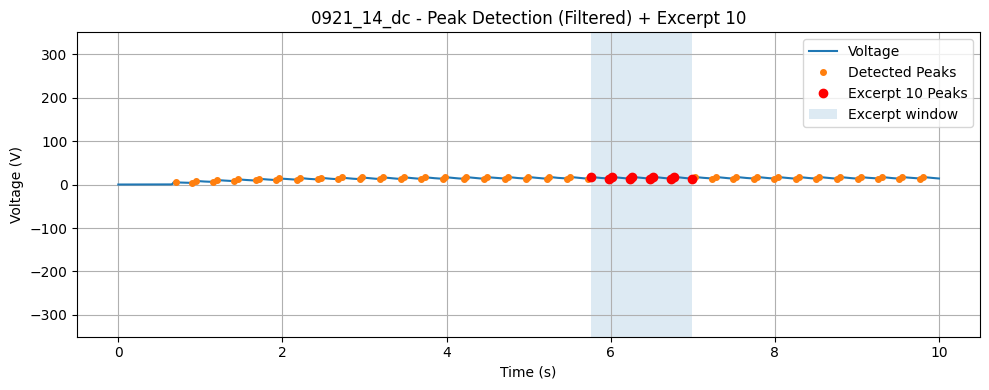

0921_14_dc_2_Vpp: 4.80 V
0921_14_dc_2_Peak number: 70개
0921_14_dc_2_표준편차: 0.50
0921_14_dc_2_주파수: 21.15 Hz
👉 0921_14_dc_2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 200.25
   - 발췌 평균 Vpp: 5.08 V (표준편차: 0.10 V)
   - 발췌 평균 주파수: 24.94 Hz


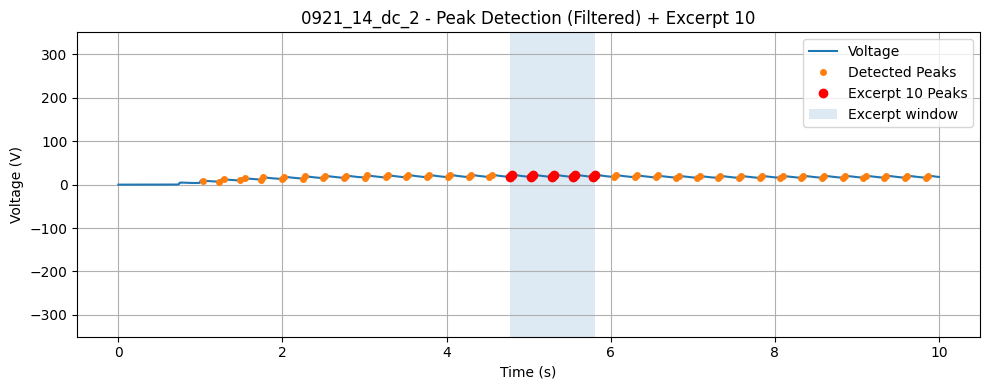

0921_16_ac_Vpp: 444.39 V
0921_16_ac_Peak number: 79개
0921_16_ac_표준편차: 25.27
0921_16_ac_주파수: 11.60 Hz
👉 0921_16_ac 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 2356.94
   - 발췌 평균 Vpp: 471.20 V (표준편차: 12.01 V)
   - 발췌 평균 주파수: 10.39 Hz


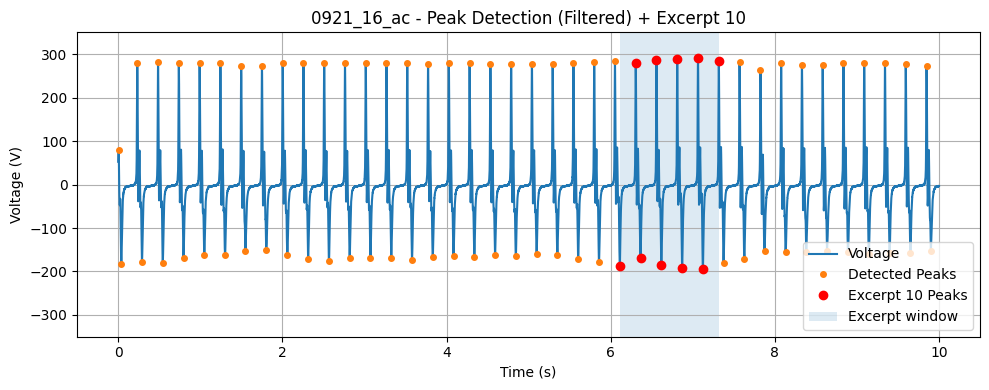

0921_16_ac_2_Vpp: 504.63 V
0921_16_ac_2_Peak number: 78개
0921_16_ac_2_표준편차: 5.41
0921_16_ac_2_주파수: 10.96 Hz
👉 0921_16_ac_2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 2561.20
   - 발췌 평균 Vpp: 511.78 V (표준편차: 2.15 V)
   - 발췌 평균 주파수: 11.56 Hz


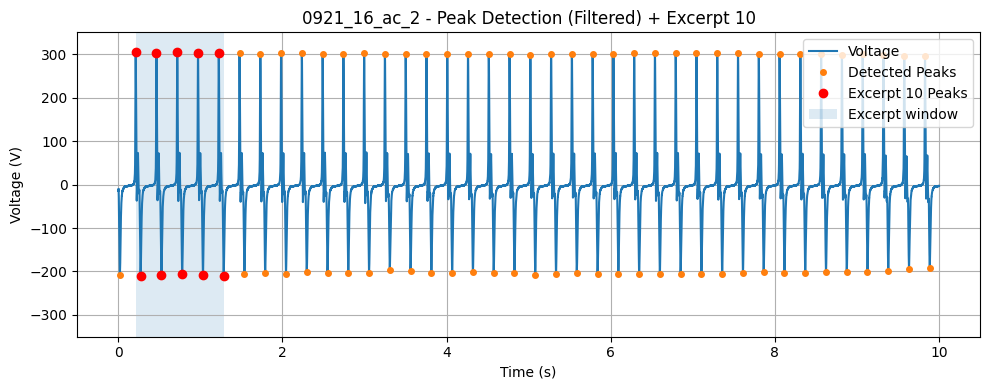

0921_16_dc_Vpp: 5.19 V
0921_16_dc_Peak number: 70개
0921_16_dc_표준편차: 0.58
0921_16_dc_주파수: 22.48 Hz
👉 0921_16_dc 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 206.13
   - 발췌 평균 Vpp: 5.43 V (표준편차: 0.08 V)
   - 발췌 평균 주파수: 27.46 Hz


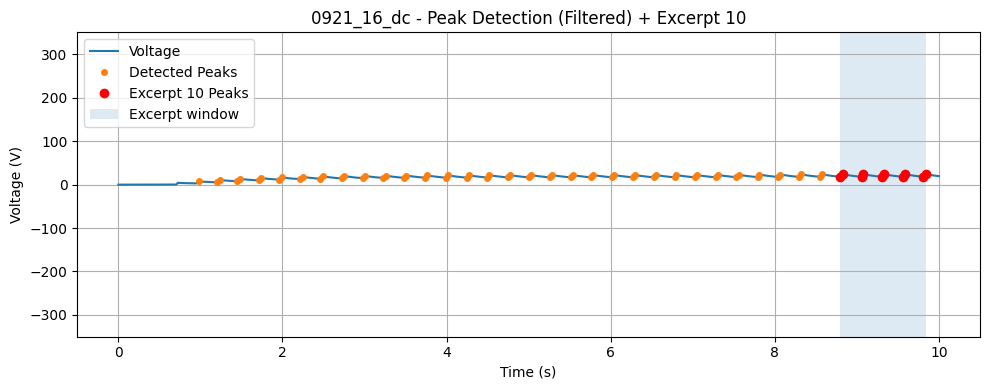

0921_16_dc_2_Vpp: 5.09 V
0921_16_dc_2_Peak number: 70개
0921_16_dc_2_표준편차: 0.53
0921_16_dc_2_주파수: 22.30 Hz
👉 0921_16_dc_2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 192.71
   - 발췌 평균 Vpp: 5.29 V (표준편차: 0.10 V)
   - 발췌 평균 주파수: 25.17 Hz


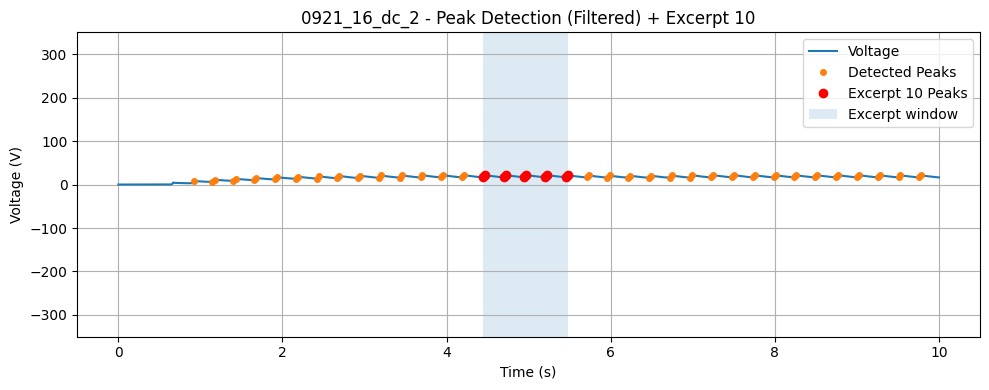

0921_2_ac_Vpp: 89.51 V
0921_2_ac_Peak number: 79개
0921_2_ac_표준편차: 1.48
0921_2_ac_주파수: 12.68 Hz
👉 0921_2_ac 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 456.19
   - 발췌 평균 Vpp: 91.21 V (표준편차: 0.28 V)
   - 발췌 평균 주파수: 13.43 Hz


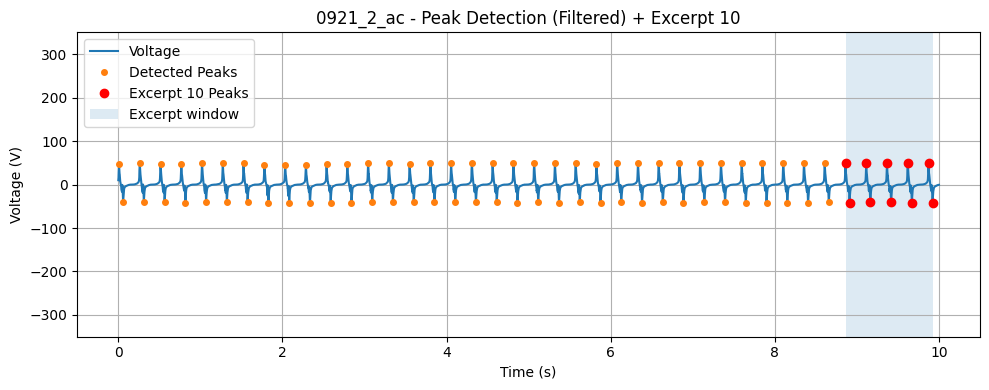

0921_2_ac_2_Vpp: 89.40 V
0921_2_ac_2_Peak number: 85개
0921_2_ac_2_표준편차: 3.01
0921_2_ac_2_주파수: 23.20 Hz
👉 0921_2_ac_2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 464.53
   - 발췌 평균 Vpp: 93.23 V (표준편차: 1.18 V)
   - 발췌 평균 주파수: 20.21 Hz


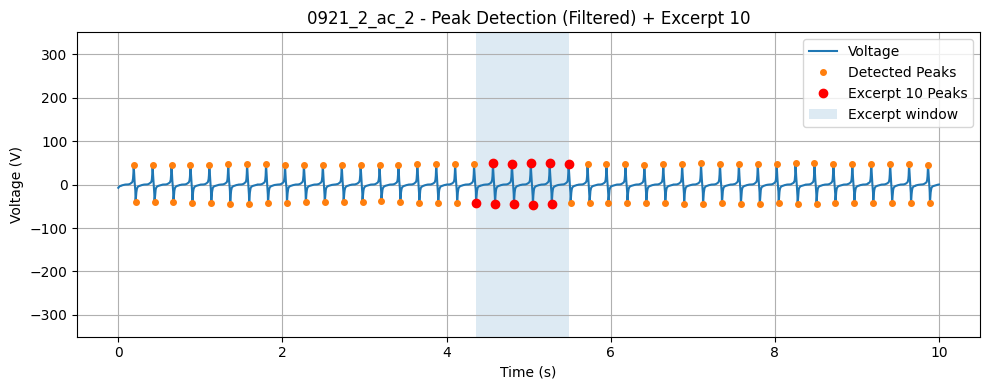

0921_2_dc_Vpp: 0.83 V
0921_2_dc_Peak number: 71개
0921_2_dc_표준편차: 0.11
0921_2_dc_주파수: 11.82 Hz
👉 0921_2_dc 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 33.04
   - 발췌 평균 Vpp: 0.87 V (표준편차: 0.03 V)
   - 발췌 평균 주파수: 11.45 Hz


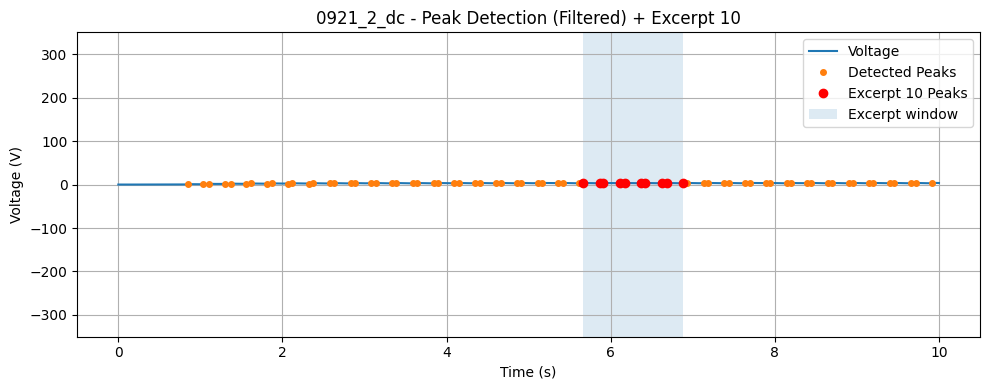

0921_2_dc_2_Vpp: 0.79 V
0921_2_dc_2_Peak number: 78개
0921_2_dc_2_표준편차: 0.09
0921_2_dc_2_주파수: 13.55 Hz
👉 0921_2_dc_2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 32.38
   - 발췌 평균 Vpp: 0.82 V (표준편차: 0.00 V)
   - 발췌 평균 주파수: 15.06 Hz


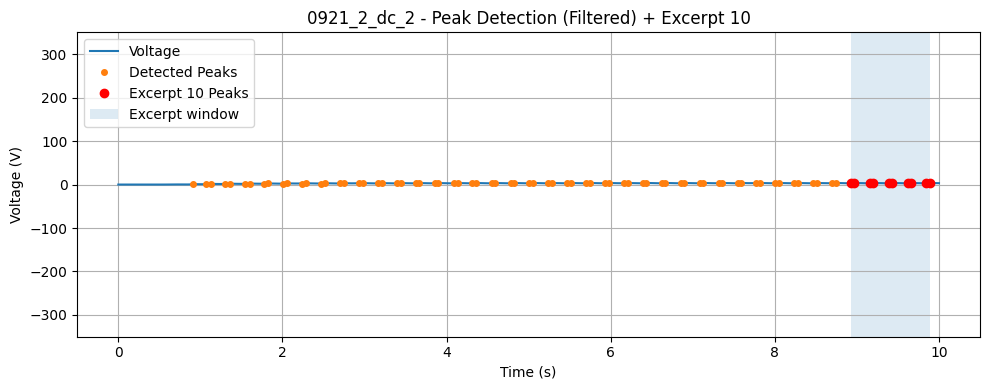

0921_4_ac_Vpp: 176.73 V
0921_4_ac_Peak number: 72개
0921_4_ac_표준편차: 6.56
0921_4_ac_주파수: 7.54 Hz
👉 0921_4_ac 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 916.06
   - 발췌 평균 Vpp: 182.33 V (표준편차: 6.60 V)
   - 발췌 평균 주파수: 7.38 Hz


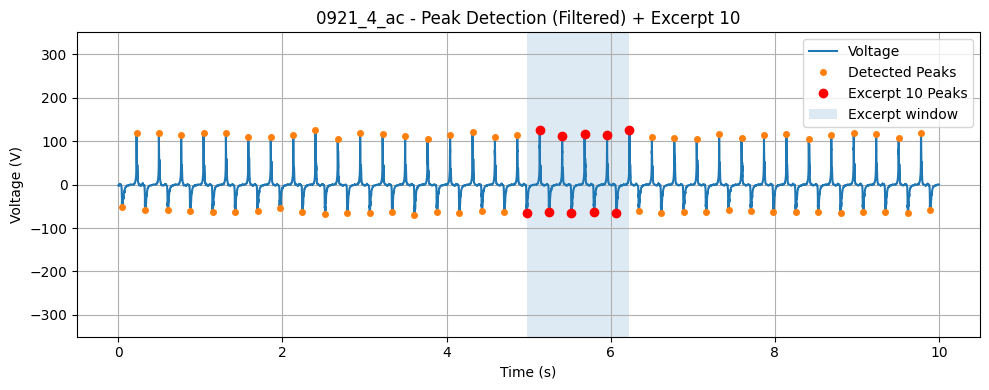

0921_4_ac_2_Vpp: 189.13 V
0921_4_ac_2_Peak number: 86개
0921_4_ac_2_표준편차: 16.80
0921_4_ac_2_주파수: 28.93 Hz
👉 0921_4_ac_2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 997.23
   - 발췌 평균 Vpp: 199.23 V (표준편차: 2.90 V)
   - 발췌 평균 주파수: 28.86 Hz


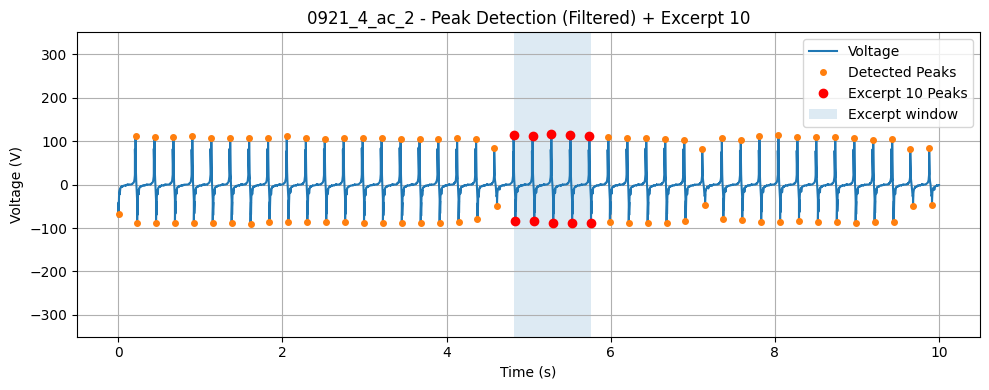

0921_4_dc_Vpp: 3.27 V
0921_4_dc_Peak number: 78개
0921_4_dc_표준편차: 0.69
0921_4_dc_주파수: 13.48 Hz
👉 0921_4_dc 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 53.96
   - 발췌 평균 Vpp: 3.79 V (표준편차: 0.50 V)
   - 발췌 평균 주파수: 12.85 Hz


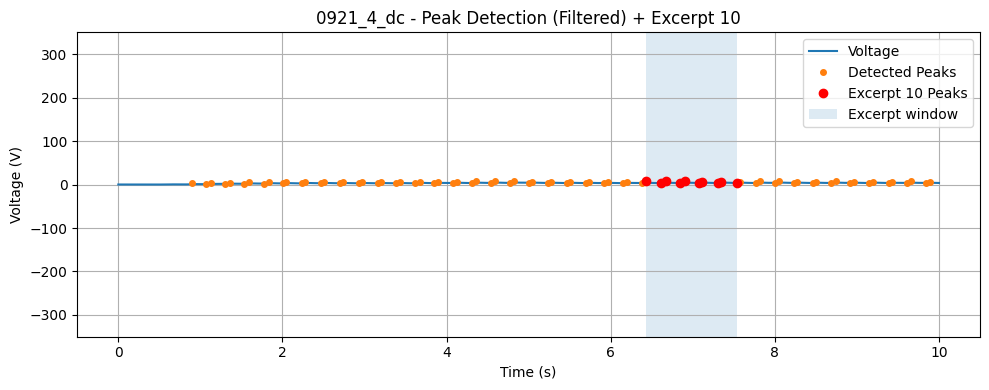

0921_4_dc_2_Vpp: 3.77 V
0921_4_dc_2_Peak number: 80개
0921_4_dc_2_표준편차: 0.51
0921_4_dc_2_주파수: 13.81 Hz
👉 0921_4_dc_2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 64.93
   - 발췌 평균 Vpp: 4.12 V (표준편차: 0.21 V)
   - 발췌 평균 주파수: 12.58 Hz


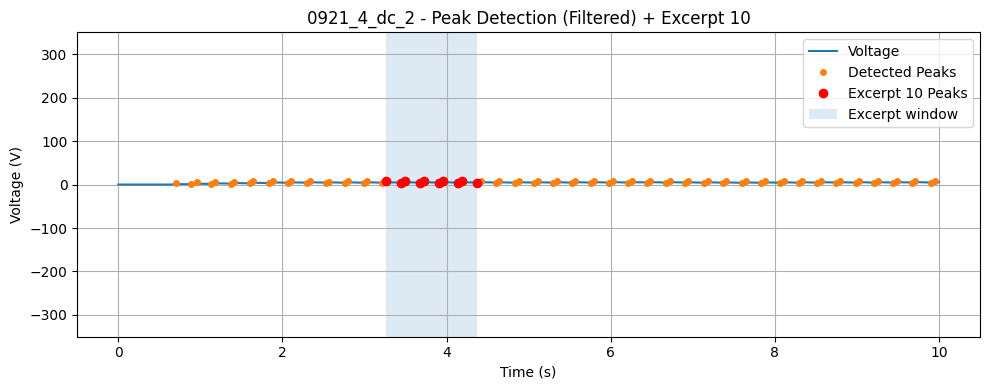

0921_6_ac_Vpp: 240.76 V
0921_6_ac_Peak number: 85개
0921_6_ac_표준편차: 6.43
0921_6_ac_주파수: 20.07 Hz
👉 0921_6_ac 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 1244.47
   - 발췌 평균 Vpp: 249.03 V (표준편차: 1.86 V)
   - 발췌 평균 주파수: 15.43 Hz


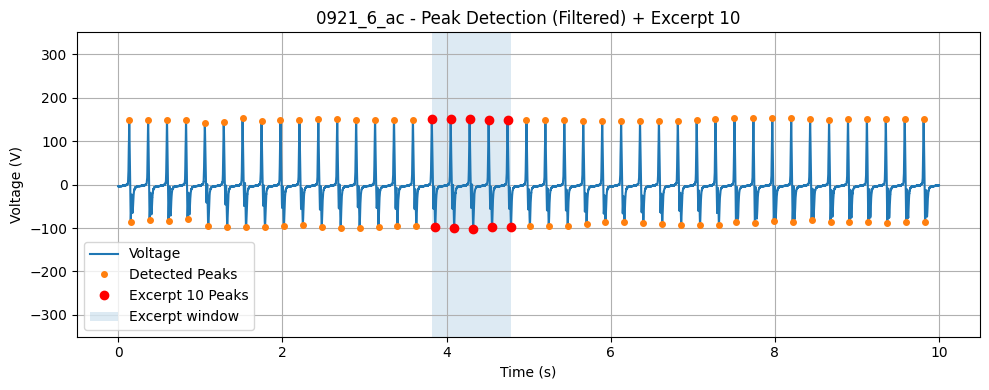

0921_6_ac_2_Vpp: 261.31 V
0921_6_ac_2_Peak number: 79개
0921_6_ac_2_표준편차: 3.63
0921_6_ac_2_주파수: 13.18 Hz
👉 0921_6_ac_2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 1322.89
   - 발췌 평균 Vpp: 264.44 V (표준편차: 0.74 V)
   - 발췌 평균 주파수: 14.05 Hz


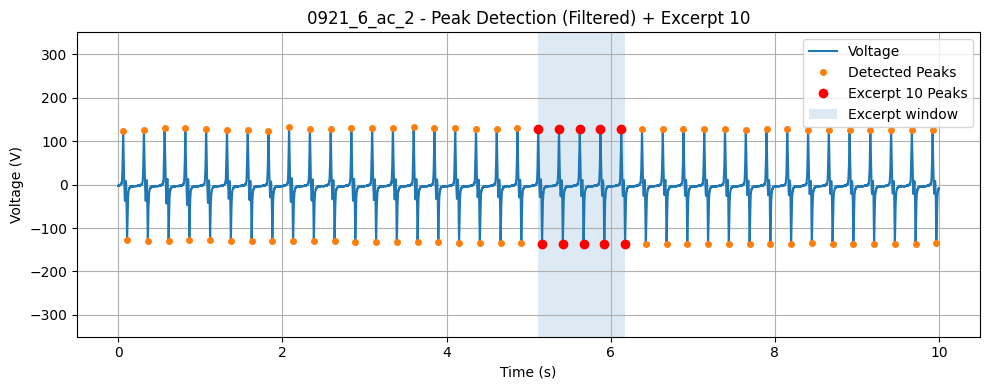

0921_6_dc_Vpp: 1.64 V
0921_6_dc_Peak number: 78개
0921_6_dc_표준편차: 0.20
0921_6_dc_주파수: 16.44 Hz
👉 0921_6_dc 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 70.28
   - 발췌 평균 Vpp: 1.71 V (표준편차: 0.08 V)
   - 발췌 평균 주파수: 15.97 Hz


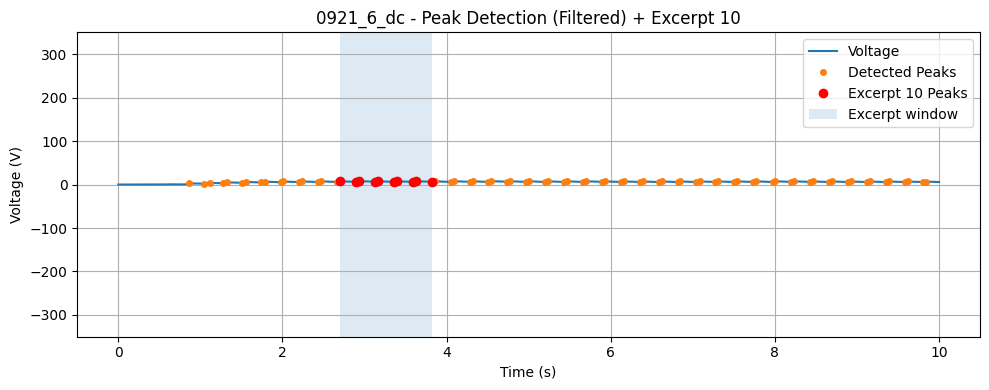

0921_6_dc_2_Vpp: 2.60 V
0921_6_dc_2_Peak number: 74개
0921_6_dc_2_표준편차: 0.32
0921_6_dc_2_주파수: 20.53 Hz
👉 0921_6_dc_2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 96.52
   - 발췌 평균 Vpp: 2.72 V (표준편차: 0.02 V)
   - 발췌 평균 주파수: 19.33 Hz


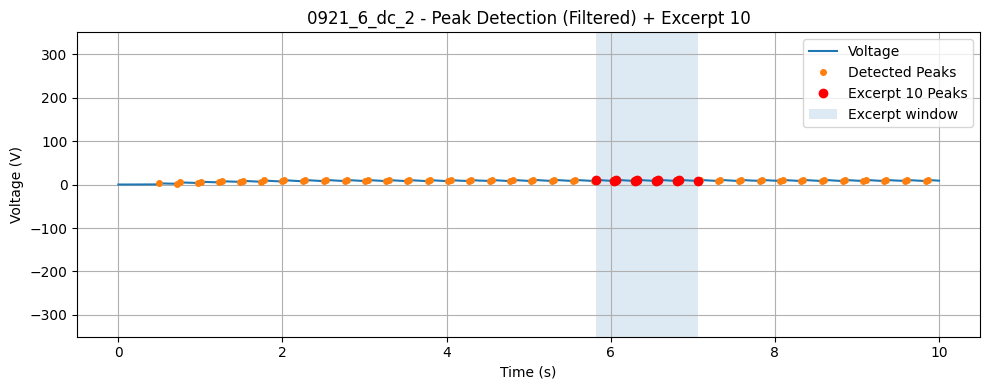

0921_8_ac_Vpp: 253.29 V
0921_8_ac_Peak number: 79개
0921_8_ac_표준편차: 8.11
0921_8_ac_주파수: 37.52 Hz
👉 0921_8_ac 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 1330.69
   - 발췌 평균 Vpp: 266.15 V (표준편차: 3.87 V)
   - 발췌 평균 주파수: 41.59 Hz


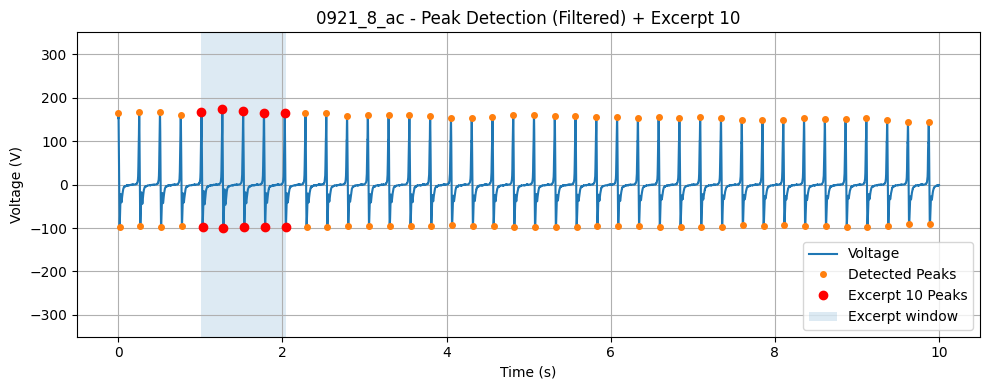

0921_8_ac_2_Vpp: 293.64 V
0921_8_ac_2_Peak number: 78개
0921_8_ac_2_표준편차: 6.17
0921_8_ac_2_주파수: 38.32 Hz
👉 0921_8_ac_2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 1508.49
   - 발췌 평균 Vpp: 301.51 V (표준편차: 0.90 V)
   - 발췌 평균 주파수: 43.26 Hz


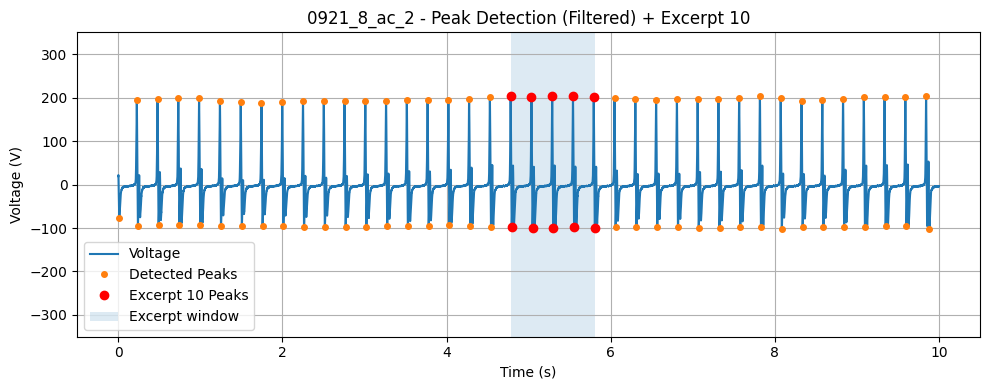

0921_8_dc_Vpp: 3.29 V
0921_8_dc_Peak number: 70개
0921_8_dc_표준편차: 0.37
0921_8_dc_주파수: 21.82 Hz
👉 0921_8_dc 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 110.64
   - 발췌 평균 Vpp: 3.39 V (표준편차: 0.06 V)
   - 발췌 평균 주파수: 20.43 Hz


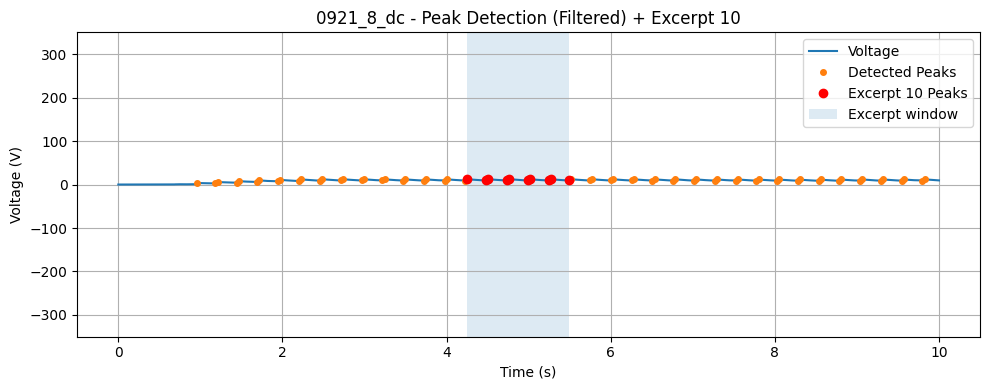

0921_8_dc_2_Vpp: 2.72 V
0921_8_dc_2_Peak number: 78개
0921_8_dc_2_표준편차: 0.37
0921_8_dc_2_주파수: 19.07 Hz
👉 0921_8_dc_2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 97.16
   - 발췌 평균 Vpp: 3.01 V (표준편차: 0.11 V)
   - 발췌 평균 주파수: 18.20 Hz


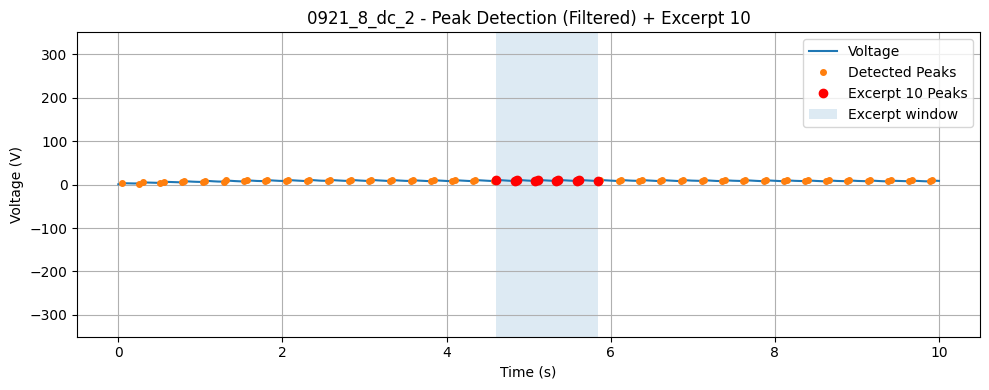

0921_bopp1_Vpp: 64.15 V
0921_bopp1_Peak number: 78개
0921_bopp1_표준편차: 0.88
0921_bopp1_주파수: 10.02 Hz
👉 0921_bopp1 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 327.99
   - 발췌 평균 Vpp: 65.62 V (표준편차: 0.33 V)
   - 발췌 평균 주파수: 10.50 Hz


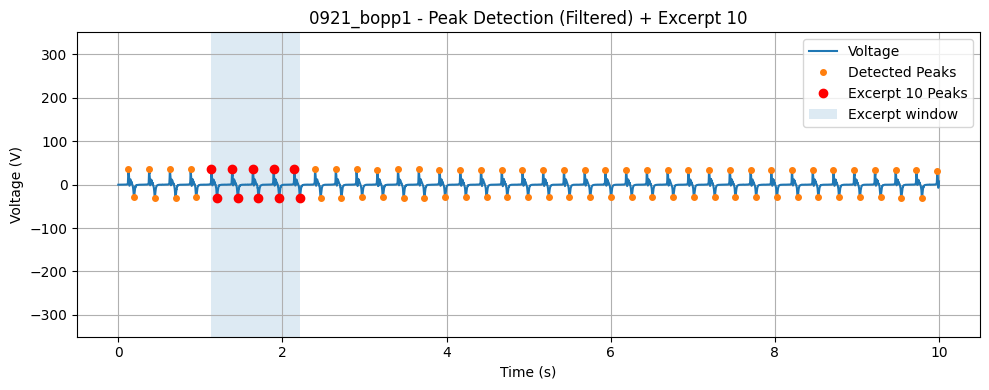

0921_bopp2_Vpp: 62.78 V
0921_bopp2_Peak number: 79개
0921_bopp2_표준편차: 0.54
0921_bopp2_주파수: 11.99 Hz
👉 0921_bopp2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 316.81
   - 발췌 평균 Vpp: 63.42 V (표준편차: 0.38 V)
   - 발췌 평균 주파수: 12.69 Hz


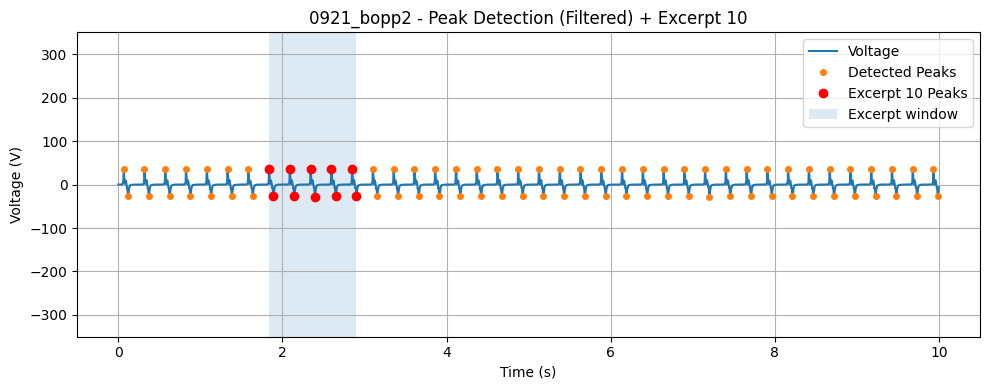

0921_bopp3_Vpp: 52.02 V
0921_bopp3_Peak number: 79개
0921_bopp3_표준편차: 1.85
0921_bopp3_주파수: 35.12 Hz
👉 0921_bopp3 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 268.22
   - 발췌 평균 Vpp: 53.62 V (표준편차: 0.17 V)
   - 발췌 평균 주파수: 38.18 Hz


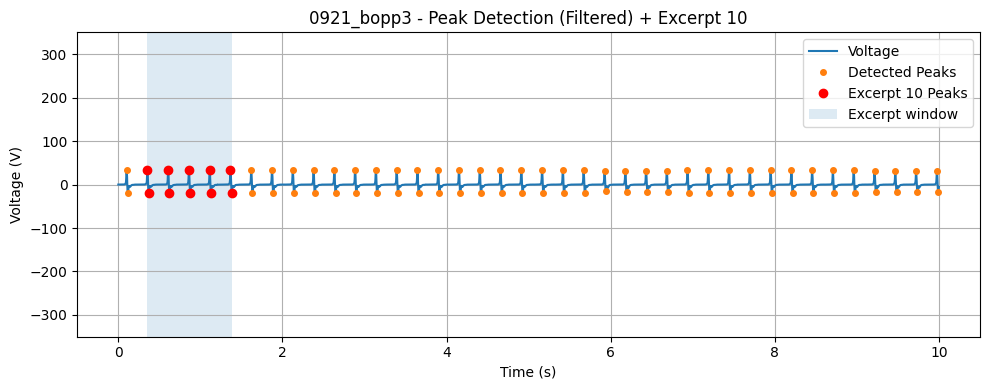

0921_fep1_Vpp: 329.49 V
0921_fep1_Peak number: 77개
0921_fep1_표준편차: 9.19
0921_fep1_주파수: 12.27 Hz
👉 0921_fep1 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 1705.64
   - 발췌 평균 Vpp: 341.15 V (표준편차: 1.52 V)
   - 발췌 평균 주파수: 12.83 Hz


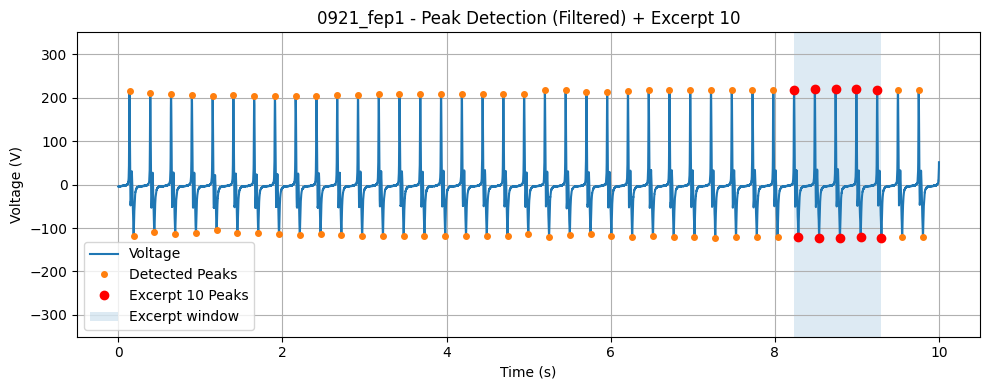

0921_fep2_Vpp: 255.87 V
0921_fep2_Peak number: 78개
0921_fep2_표준편차: 8.04
0921_fep2_주파수: 13.04 Hz
👉 0921_fep2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 1366.88
   - 발췌 평균 Vpp: 273.68 V (표준편차: 4.58 V)
   - 발췌 평균 주파수: 13.64 Hz


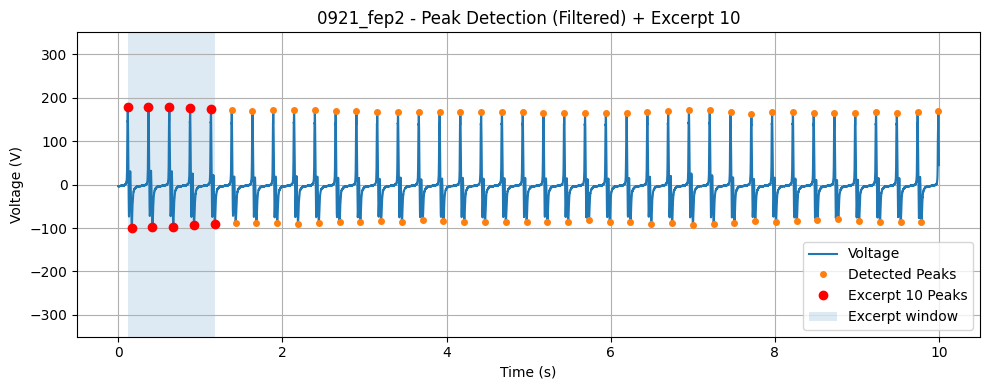

0921_fep3_Vpp: 267.10 V
0921_fep3_Peak number: 77개
0921_fep3_표준편차: 3.24
0921_fep3_주파수: 25.91 Hz
👉 0921_fep3 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 1363.13
   - 발췌 평균 Vpp: 272.64 V (표준편차: 0.54 V)
   - 발췌 평균 주파수: 27.53 Hz


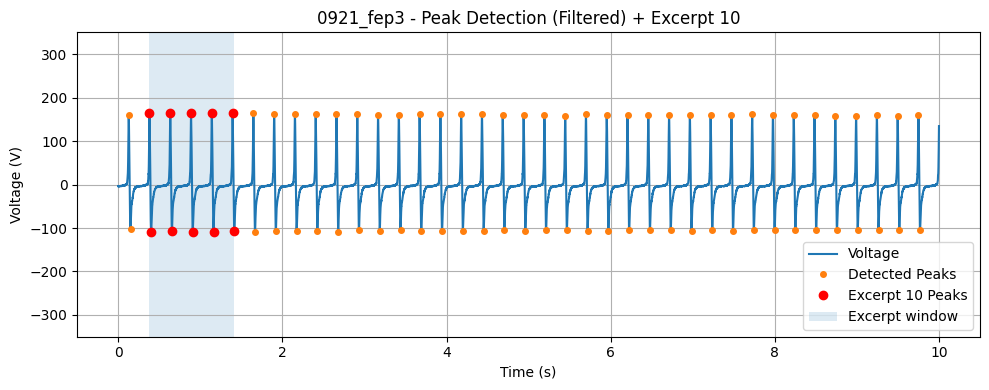

0921_pdms1_Vpp: 66.66 V
0921_pdms1_Peak number: 78개
0921_pdms1_표준편차: 1.72
0921_pdms1_주파수: 11.16 Hz
👉 0921_pdms1 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 349.31
   - 발췌 평균 Vpp: 69.92 V (표준편차: 2.33 V)
   - 발췌 평균 주파수: 10.08 Hz


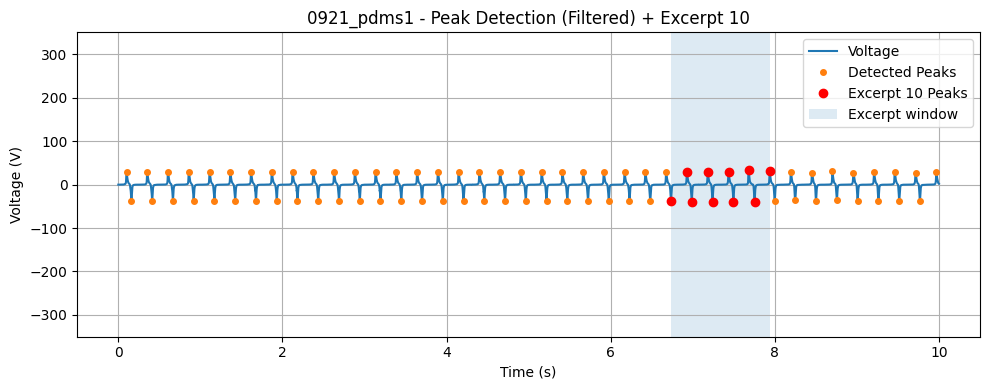

0921_pdms2_Vpp: 144.15 V
0921_pdms2_Peak number: 78개
0921_pdms2_표준편차: 3.48
0921_pdms2_주파수: 12.15 Hz
👉 0921_pdms2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 740.06
   - 발췌 평균 Vpp: 148.14 V (표준편차: 0.47 V)
   - 발췌 평균 주파수: 13.01 Hz


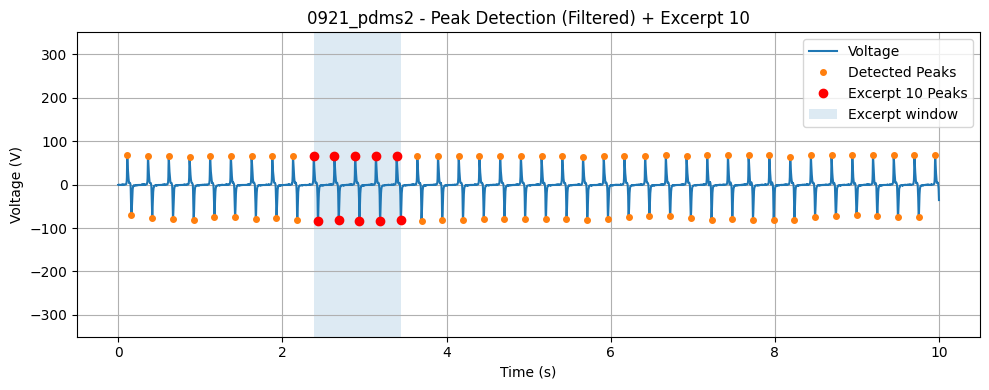

0921_pdms3_Vpp: 47.52 V
0921_pdms3_Peak number: 79개
0921_pdms3_표준편차: 0.32
0921_pdms3_주파수: 17.61 Hz
👉 0921_pdms3 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 239.85
   - 발췌 평균 Vpp: 47.99 V (표준편차: 0.16 V)
   - 발췌 평균 주파수: 19.01 Hz


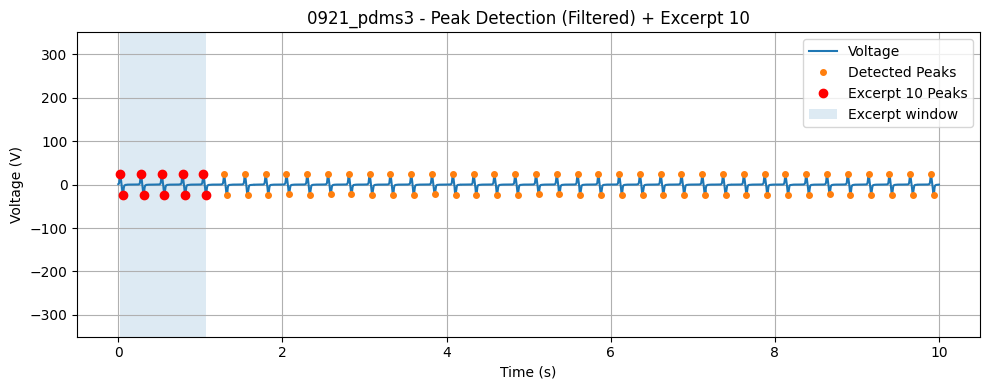

0921_pet1_Vpp: 44.94 V
0921_pet1_Peak number: 78개
0921_pet1_표준편차: 0.83
0921_pet1_주파수: 11.80 Hz
👉 0921_pet1 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 231.96
   - 발췌 평균 Vpp: 46.37 V (표준편차: 0.19 V)
   - 발췌 평균 주파수: 12.49 Hz


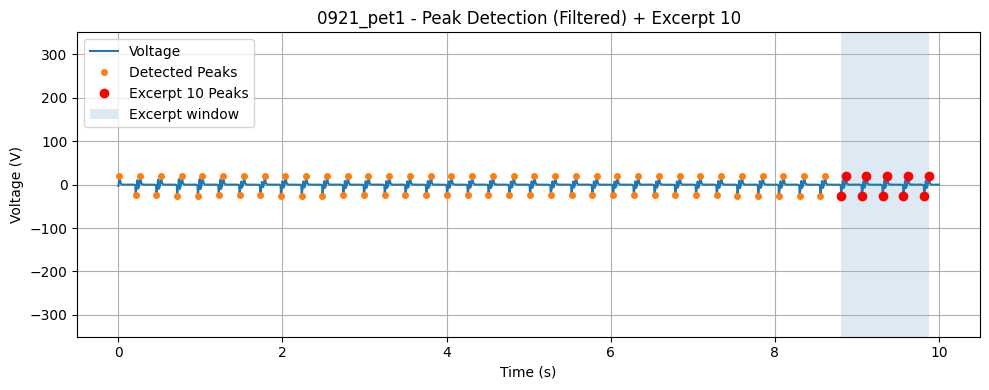

0921_pet2_Vpp: 33.20 V
0921_pet2_Peak number: 78개
0921_pet2_표준편차: 0.88
0921_pet2_주파수: 11.70 Hz
👉 0921_pet2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 171.56
   - 발췌 평균 Vpp: 34.30 V (표준편차: 0.12 V)
   - 발췌 평균 주파수: 12.40 Hz


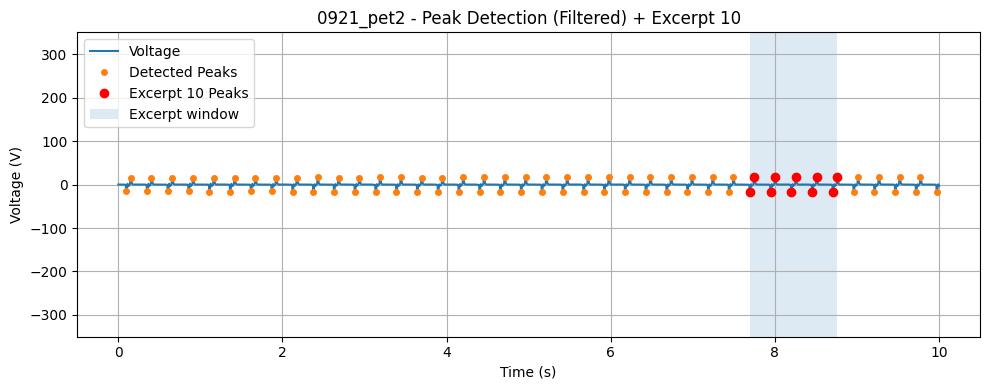

0921_pet3_Vpp: 39.38 V
0921_pet3_Peak number: 77개
0921_pet3_표준편차: 0.43
0921_pet3_주파수: 12.34 Hz
👉 0921_pet3 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 199.03
   - 발췌 평균 Vpp: 39.78 V (표준편차: 0.34 V)
   - 발췌 평균 주파수: 11.24 Hz


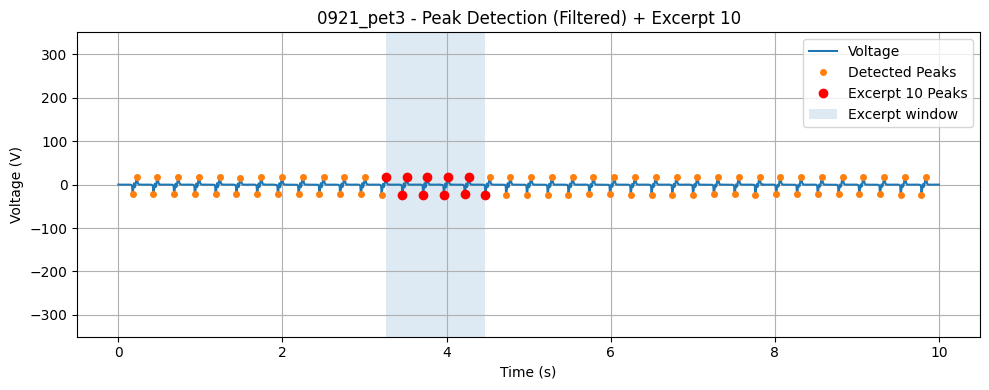

0921_pi1_Vpp: 21.86 V
0921_pi1_Peak number: 79개
0921_pi1_표준편차: 0.85
0921_pi1_주파수: 12.72 Hz
👉 0921_pi1 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 118.08
   - 발췌 평균 Vpp: 23.56 V (표준편차: 0.85 V)
   - 발췌 평균 주파수: 13.77 Hz


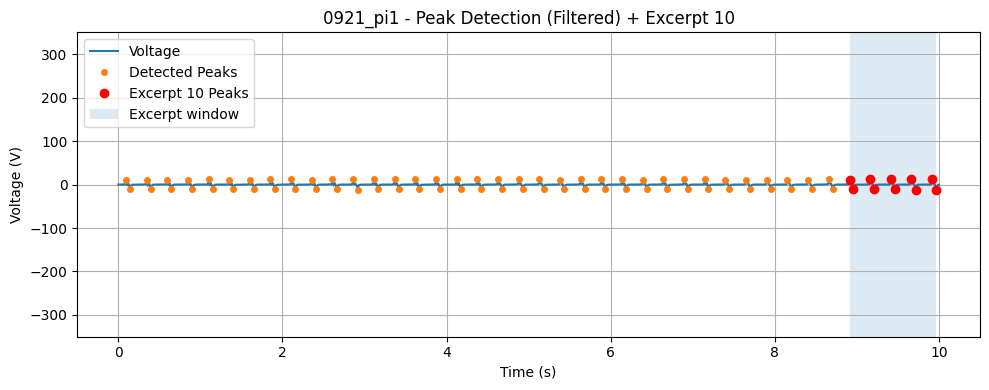

0921_pi2_Vpp: 21.92 V
0921_pi2_Peak number: 78개
0921_pi2_표준편차: 0.57
0921_pi2_주파수: 12.34 Hz
👉 0921_pi2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 115.30
   - 발췌 평균 Vpp: 22.98 V (표준편차: 1.02 V)
   - 발췌 평균 주파수: 11.22 Hz


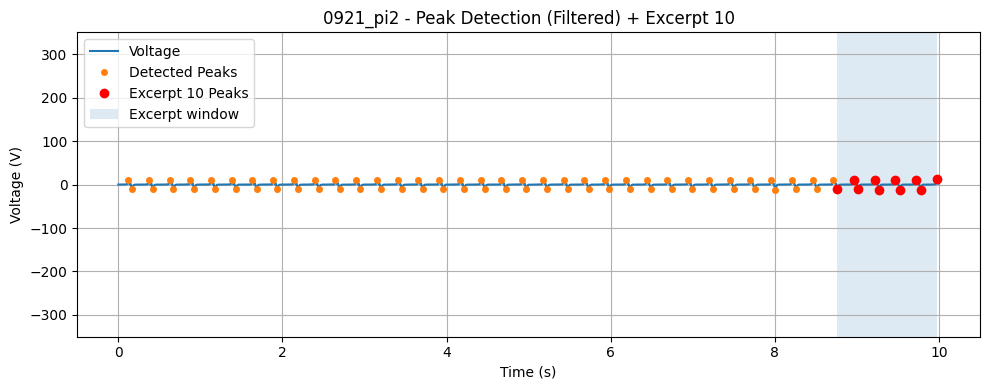

0921_pi3_Vpp: 19.58 V
0921_pi3_Peak number: 77개
0921_pi3_표준편차: 0.48
0921_pi3_주파수: 12.13 Hz
👉 0921_pi3 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 100.78
   - 발췌 평균 Vpp: 20.16 V (표준편차: 0.06 V)
   - 발췌 평균 주파수: 12.78 Hz


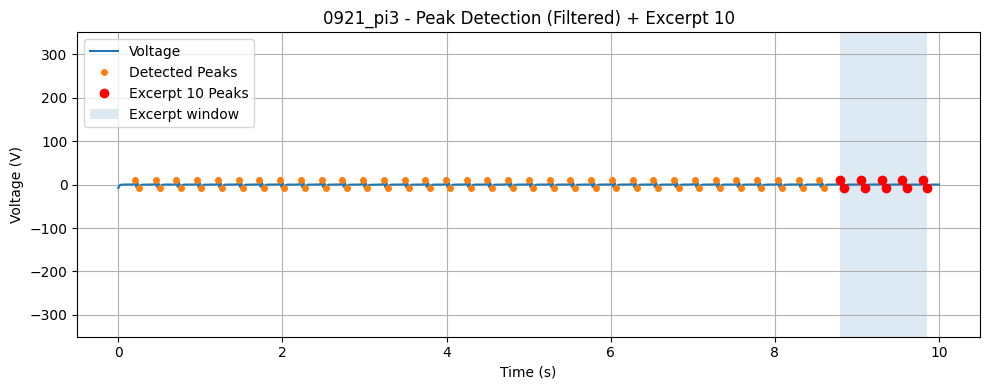

0921_ptfe1_Vpp: 44.43 V
0921_ptfe1_Peak number: 77개
0921_ptfe1_표준편차: 1.85
0921_ptfe1_주파수: 13.30 Hz
👉 0921_ptfe1 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 234.37
   - 발췌 평균 Vpp: 46.92 V (표준편차: 0.42 V)
   - 발췌 평균 주파수: 13.76 Hz


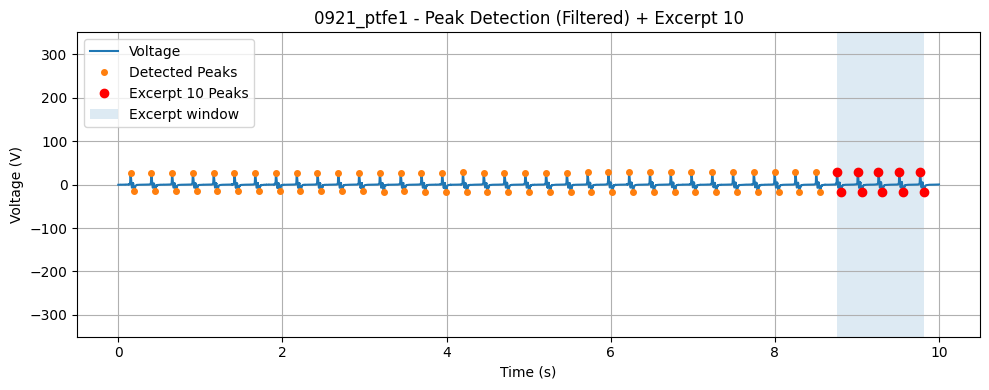

0921_ptfe2_Vpp: 89.05 V
0921_ptfe2_Peak number: 77개
0921_ptfe2_표준편차: 1.37
0921_ptfe2_주파수: 10.58 Hz
👉 0921_ptfe2 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 453.85
   - 발췌 평균 Vpp: 90.68 V (표준편차: 0.28 V)
   - 발췌 평균 주파수: 10.14 Hz


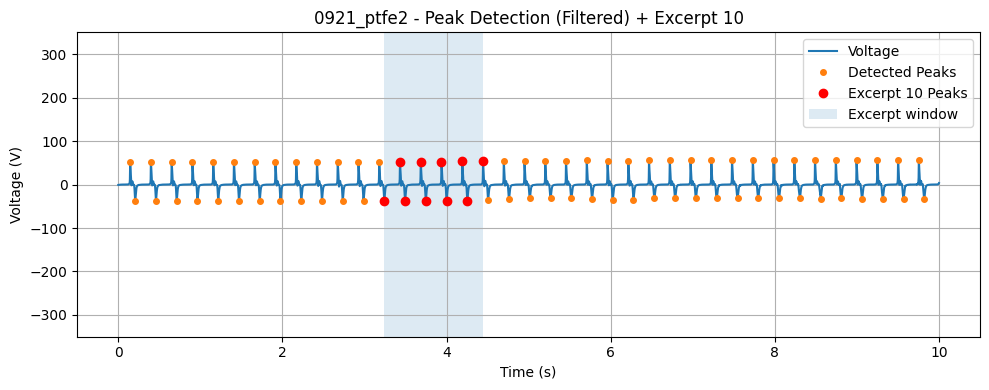

0921_ptfe3_Vpp: 102.81 V
0921_ptfe3_Peak number: 78개
0921_ptfe3_표준편차: 0.79
0921_ptfe3_주파수: 10.95 Hz
👉 0921_ptfe3 발췌(연속 10개) 정보
   - 합계(피크 크기 합): 520.28
   - 발췌 평균 Vpp: 103.98 V (표준편차: 0.49 V)
   - 발췌 평균 주파수: 11.60 Hz


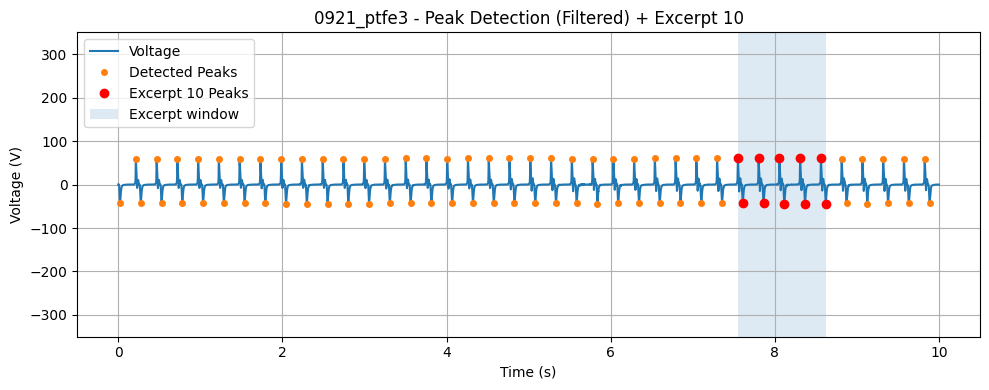


🎯 모든 파일 발췌 결과 요약 (연속 10개 피크 기준)
0921_10_ac.csv | Vpp: 322.42 V | 표준편차: 4.37 V | 주파수: 30.12 Hz
0921_10_ac_2.csv | Vpp: 353.35 V | 표준편차: 0.48 V | 주파수: 12.81 Hz
0921_10_dc.csv | Vpp: 3.76 V | 표준편차: 0.05 V | 주파수: 20.85 Hz
0921_10_dc_2.csv | Vpp: 3.02 V | 표준편차: 0.14 V | 주파수: 18.28 Hz
0921_12_ac.csv | Vpp: 354.03 V | 표준편차: 1.07 V | 주파수: 13.73 Hz
0921_12_ac_2.csv | Vpp: 380.40 V | 표준편차: 1.92 V | 주파수: 14.06 Hz
0921_12_dc.csv | Vpp: 3.55 V | 표준편차: 0.06 V | 주파수: 21.64 Hz
0921_12_dc_2.csv | Vpp: 4.79 V | 표준편차: 0.04 V | 주파수: 23.13 Hz
0921_14_ac.csv | Vpp: 389.77 V | 표준편차: 3.54 V | 주파수: 13.62 Hz
0921_14_ac_2.csv | Vpp: 452.42 V | 표준편차: 1.72 V | 주파수: 14.36 Hz
0921_14_dc.csv | Vpp: 4.33 V | 표준편차: 0.06 V | 주파수: 15.76 Hz
0921_14_dc_2.csv | Vpp: 5.08 V | 표준편차: 0.10 V | 주파수: 24.94 Hz
0921_16_ac.csv | Vpp: 471.20 V | 표준편차: 12.01 V | 주파수: 10.39 Hz
0921_16_ac_2.csv | Vpp: 511.78 V | 표준편차: 2.15 V | 주파수: 11.56 Hz
0921_16_dc.csv | Vpp: 5.43 V | 표준편차: 0.08 V | 주파수: 27.46 Hz
0921_16_dc_2.csv | Vpp: 5.29 V | 표준편

In [8]:
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
all_vpp_values = []
file_std_values = []
all_freq_values = []

# (선택) 발췌 요약 모음 저장용
excerpt_mean_vpp_list = []
excerpt_std_vpp_list  = []
excerpt_mean_freq_list = []

for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    try:
        # 데이터 로드
        df = pd.read_csv(file_path)
        time = df.iloc[:, 0].values
        voltage = df.iloc[:, 1].values

        # 샘플링 속도
        total_time = time[-1] - time[0]
        sampling_rate = len(time) / total_time
        distance = int(sampling_rate * min_distance_sec)

        # ===============================
        # 피크 검출 (양/음/양+음 선택 가능)
        # ===============================
        prom = max(np.std(voltage) * prominence_ratio, min_prominence)

        if peak_mode == "neg":
            raw_peaks, _ = find_peaks(-voltage, prominence=prom, distance=distance)

        elif peak_mode == "pos":
            raw_peaks, _ = find_peaks(voltage, prominence=prom, distance=distance)

        elif peak_mode == "both":
            raw_peaks_pos, _ = find_peaks(voltage, prominence=prom, distance=distance)
            raw_peaks_neg, _ = find_peaks(-voltage, prominence=prom, distance=distance)
            raw_peaks = np.sort(np.concatenate([raw_peaks_pos, raw_peaks_neg]))

        else:
            raise ValueError("peak_mode는 'neg', 'pos', 'both' 중 하나여야 합니다.")

        # 피크 필터링(SNR/상대높이)
        if peak_mode == "neg":
            max_amplitude = np.max(-voltage) if len(voltage) > 0 else 0.0
        elif peak_mode == "pos":
            max_amplitude = np.max(voltage) if len(voltage) > 0 else 0.0
        elif peak_mode == "both":
            max_amplitude = np.max(np.abs(voltage)) if len(voltage) > 0 else 0.0
        else:
            max_amplitude = 0.0
        
        final_peaks = []
        for i in raw_peaks:
            left  = max(0, i - int(0.05 * sampling_rate))
            right = min(len(voltage), i + int(0.05 * sampling_rate))
            local_noise = max(np.std(voltage[left:right]), 1e-6)
            signal = abs(voltage[i])  # pos/neg/both 모두 대응
            if signal > max_amplitude * min_relative_height and (signal / local_noise) > snr_threshold:
                final_peaks.append(i)
        final_peaks = np.array(final_peaks, dtype=int)
        

        final_peaks = np.array(final_peaks, dtype=int)
        peak_times  = time[final_peaks]

        # 전체 Vpp 계산(연속 피크 사이 구간의 Vpp)
        vpp_list = []
        for i in range(len(final_peaks) - 1):
            s = final_peaks[i]
            e = final_peaks[i + 1]
            vpp = np.max(voltage[s:e + 1]) - np.min(voltage[s:e + 1])
            vpp_list.append(vpp)
        mean_vpp = np.mean(vpp_list) if vpp_list else 0.0
        std_vpp  = np.std(vpp_list, ddof=1) if len(vpp_list) > 1 else 0.0

        # 전체 평균 주파수
        if len(peak_times) < 2:
            mean_freq = 0.0
        else:
            periods = np.diff(peak_times)
            mean_freq = float(np.mean(1.0 / periods))

        base_name = os.path.splitext(file_name)[0]
        print(f"{base_name}_Vpp: {mean_vpp:.2f} V")
        print(f"{base_name}_Peak number: {len(vpp_list):.0f}개")
        print(f"{base_name}_표준편차: {std_vpp:.2f}")
        print(f"{base_name}_주파수: {mean_freq:.2f} Hz")

        # 저장
        all_vpp_values.append(mean_vpp)
        file_std_values.append(std_vpp)
        all_freq_values.append(mean_freq)

        # ====== [신규 기능] 연속된 5개 피크 중 합이 최대인 집합 발췌 ======
        if len(final_peaks) >= window_peaks:
            # 피크 크기 정의: 모드별로 다르게
            if peak_mode == "neg":
                peak_mags = -voltage[final_peaks].astype(float)
            elif peak_mode == "pos":
                peak_mags = voltage[final_peaks].astype(float)
            elif peak_mode == "both":
                peak_mags = np.abs(voltage[final_peaks]).astype(float)
            else:
                raise ValueError("peak_mode는 'neg', 'pos', 'both' 중 하나여야 합니다.")

            # 누적합을 이용해 길이 window_peaks의 구간합 계산
            csum = np.cumsum(peak_mags)
            sums = csum[window_peaks - 1:] - np.concatenate(([0.0], csum[:-window_peaks]))
            best_start_idx = int(np.argmax(sums))
            best_end_idx   = best_start_idx + window_peaks  # 슬라이스 끝 인덱스(포함X)

            # 발췌된 5개 피크의 "원본 인덱스"
            excerpt_peak_idx = final_peaks[best_start_idx:best_end_idx]
            excerpt_peak_times = time[excerpt_peak_idx]
            excerpt_peak_mags  = peak_mags[best_start_idx:best_end_idx]


            # 발췌 구간의 Vpp(연속 5개 피크 사이 구간은 4개)
            excerpt_vpp = []
            for j in range(window_peaks - 1):
                s = excerpt_peak_idx[j]
                e = excerpt_peak_idx[j + 1]
                vpp_seg = np.max(voltage[s:e + 1]) - np.min(voltage[s:e + 1])
                excerpt_vpp.append(vpp_seg)
            excerpt_mean_vpp = float(np.mean(excerpt_vpp)) if excerpt_vpp else 0.0
            excerpt_std_vpp  = float(np.std(excerpt_vpp, ddof=1)) if len(excerpt_vpp) > 1 else 0.0

            # 발췌 구간의 평균 주파수(5개 피크 → 4개 구간)
            if len(excerpt_peak_times) >= 2:
                excerpt_periods = np.diff(excerpt_peak_times)
                excerpt_mean_freq = float(np.mean(1.0 / excerpt_periods))
            else:
                excerpt_mean_freq = 0.0

            # 콘솔 출력
            print(f"👉 {base_name} 발췌(연속 {window_peaks}개) 정보")
            #print(f"   - 피크 시간(s): {', '.join([f'{t:.4f}' for t in excerpt_peak_times])}")
            #print(f"   - 피크 크기(V, -voltage): {', '.join([f'{m:.2f}' for m in excerpt_peak_mags])}")
            print(f"   - 합계(피크 크기 합): {np.sum(excerpt_peak_mags):.2f}")
            print(f"   - 발췌 평균 Vpp: {excerpt_mean_vpp:.2f} V (표준편차: {excerpt_std_vpp:.2f} V)")
            print(f"   - 발췌 평균 주파수: {excerpt_mean_freq:.2f} Hz")

            # (선택) 전체 요약용 리스트에 저장
            excerpt_mean_vpp_list.append(excerpt_mean_vpp)
            excerpt_std_vpp_list.append(excerpt_std_vpp)
            excerpt_mean_freq_list.append(excerpt_mean_freq)
           

            # ====== 그래프: 전체 + 발췌구간 강조 ======
            plt.figure(figsize=(10, 4))
            plt.plot(time, voltage, label='Voltage')
            # 전체 검출 피크(회색)
            if len(final_peaks) > 0:
                plt.plot(time[final_peaks], voltage[final_peaks], 'o', ms=4, label='Detected Peaks')
            # 발췌된 5개 피크(빨간 점)
            plt.plot(time[excerpt_peak_idx], voltage[excerpt_peak_idx], 'ro', ms=6, label=f'Excerpt {window_peaks} Peaks')
            # 발췌 구간 배경 밴드
            t0, t1 = time[excerpt_peak_idx[0]], time[excerpt_peak_idx[-1]]
            plt.axvspan(t0, t1, alpha=0.15, label='Excerpt window')

            plt.title(f"{base_name} - Peak Detection (Filtered) + Excerpt {window_peaks}")
            plt.xlabel("Time (s)")
            plt.ylabel("Voltage (V)")
            plt.ylim(y_range)
            plt.grid(True)
            plt.legend()
            plt.tight_layout()
            plt.show()
        else:
            # 기존 그래프(발췌 불가 시 기본만 표시)
            plt.figure(figsize=(10, 4))
            plt.plot(time, voltage, label='Voltage', color='gray')
            if len(final_peaks) > 0:
                plt.plot(time[final_peaks], voltage[final_peaks], 'ro', ms=4, label='Detected Peaks')
            plt.title(f"{base_name} - Peak Detection (Filtered) (not enough peaks for excerpt)")
            plt.xlabel("Time (s)")
            plt.ylabel("Voltage (V)")
            plt.ylim(y_range)
            plt.grid(True)
            plt.legend()
            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"{file_name} 처리 중 오류 발생: {e}")

# -------------------------------
# 전체 요약 출력
print("\n==============================")
print(f"🎯 모든 파일 발췌 결과 요약 (연속 {window_peaks}개 피크 기준)")
for i in range(len(excerpt_mean_vpp_list)):
    print(f"{csv_files[i]} | Vpp: {excerpt_mean_vpp_list[i]:.2f} V | "
          f"표준편차: {excerpt_std_vpp_list[i]:.2f} V | "
          f"주파수: {excerpt_mean_freq_list[i]:.2f} Hz")

# 전체 평균 요약
if excerpt_mean_vpp_list:
    avg_vpp = np.mean(excerpt_mean_vpp_list)
    avg_std = np.std(excerpt_mean_vpp_list, ddof=1) if len(excerpt_mean_vpp_list) > 1 else 0.0
    avg_freq = np.mean(excerpt_mean_freq_list)

    print("\n==============================")
    print(f"📊 발췌 구간 전체 평균 Vpp: {avg_vpp:.2f} V")
    print(f"📉 발췌 구간 표준편차(Vpp): {avg_std:.2f} V")
    print(f"🎵 발췌 구간 평균 주파수: {avg_freq:.2f} Hz")

    # ===============================
    # CSV 저장 여부 선택
    # ===============================
    

    if save_summary_csv:
        summary_df = pd.DataFrame({
            "File": csv_files[:len(excerpt_mean_vpp_list)],
            "Excerpt_Vpp": excerpt_mean_vpp_list,
            "Excerpt_Std": excerpt_std_vpp_list,
            "Excerpt_Freq": excerpt_mean_freq_list
        })

        # 평균값 한 줄 추가
        summary_df.loc["Average"] = ["ALL_AVG", avg_vpp, avg_std, avg_freq]

        output_path = os.path.join(folder_path, "00summary_excerpt_results.csv")
        summary_df.to_csv(output_path, index=False, encoding="utf-8-sig")
        print(f"✅ 요약 결과 CSV 저장 완료: {output_path}")

else:
    print("📭 Vpp 데이터를 계산할 수 없습니다.")
